In [1]:
import pandas as pd

data = pd.read_pickle('dtmsix.pkl')
data = data.transpose()
data.head()

,bbc,dailymail,fox,newsau,theguardian,thestar
aap,0,0,0,4,0,0
abc,0,0,0,1,0,0
abide,0,0,1,0,0,0
ability,2,1,0,0,1,0
able,2,18,1,0,1,6


In [2]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'bbc': [('app', 35),
  ('people', 29),
  ('coronavirus', 24),
  ('virus', 23),
  ('said', 15),
  ('trial', 12),
  ('drugs', 11),
  ('evidence', 10),
  ('tests', 10),
  ('health', 10),
  ('users', 10),
  ('data', 10),
  ('middle', 9),
  ('wildlife', 9),
  ('prof', 9),
  ('test', 8),
  ('trade', 8),
  ('contact', 8),
  ('nhs', 7),
  ('day', 7),
  ('species', 7),
  ('lockdown', 7),
  ('wild', 7),
  ('population', 7),
  ('pandemic', 7),
  ('infection', 7),
  ('disease', 7),
  ('uk', 6),
  ('world', 6),
  ('outbreak', 6)],
 'dailymail': [('app', 146),
  ('nhs', 88),
  ('contact', 80),
  ('people', 78),
  ('data', 68),
  ('said', 62),
  ('coronavirus', 50),
  ('government', 48),
  ('symptoms', 41),
  ('health', 40),
  ('mr', 39),
  ('risk', 39),
  ('person', 39),
  ('test', 36),
  ('work', 33),
  ('need', 29),
  ('phone', 29),
  ('told', 27),
  ('users', 27),
  ('information', 26),
  ('virus', 26),
  ('bluetooth', 25),
  ('going', 23),
  ('isle', 22),
  ('hancock', 22),
  ('lockdown', 22),


In [3]:
for number, top_words in top_dict.items():
    print(number)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bbc
app, people, coronavirus, virus, said, trial, drugs, evidence, tests, health, users, data, middle, wildlife
---
dailymail
app, nhs, contact, people, data, said, coronavirus, government, symptoms, health, mr, risk, person, test
---
fox
new, coronavirus, said, people, homeless, pandemic, social, china, city, york, police, news, distancing, dont
---
newsau
app, government, virus, said, vaccine, china, health, says, coronavirus, cent, picture, states, people, download
---
theguardian
virus, people, said, infection, infected, coronavirus, symptoms, risk, home, pankhania, possible, medical, like, number
---
thestar
said, care, homes, health, longterm, residents, leave, march, home, staff, nursing, cases, maternity, ontario
---


In [4]:
from collections import Counter
#we pull out most common words so we cann ad them to our stopwords

words = []
for numbers in data.columns:
    top = [word for (word,count) in top_dict[numbers]]
    for t in top:
        words.append(t)
        
words

['app',
 'people',
 'coronavirus',
 'virus',
 'said',
 'trial',
 'drugs',
 'evidence',
 'tests',
 'health',
 'users',
 'data',
 'middle',
 'wildlife',
 'prof',
 'test',
 'trade',
 'contact',
 'nhs',
 'day',
 'species',
 'lockdown',
 'wild',
 'population',
 'pandemic',
 'infection',
 'disease',
 'uk',
 'world',
 'outbreak',
 'app',
 'nhs',
 'contact',
 'people',
 'data',
 'said',
 'coronavirus',
 'government',
 'symptoms',
 'health',
 'mr',
 'risk',
 'person',
 'test',
 'work',
 'need',
 'phone',
 'told',
 'users',
 'information',
 'virus',
 'bluetooth',
 'going',
 'isle',
 'hancock',
 'lockdown',
 'come',
 'wight',
 'social',
 'time',
 'new',
 'coronavirus',
 'said',
 'people',
 'homeless',
 'pandemic',
 'social',
 'china',
 'city',
 'york',
 'police',
 'news',
 'distancing',
 'dont',
 'monday',
 'officers',
 'public',
 'media',
 'want',
 'face',
 'carlson',
 'think',
 'shelters',
 'government',
 'ohio',
 'department',
 'chinese',
 'latest',
 'weekend',
 'including',
 'app',
 'governme

In [5]:
Counter(words).most_common()

[('said', 6),
 ('people', 5),
 ('coronavirus', 5),
 ('virus', 5),
 ('health', 5),
 ('pandemic', 4),
 ('government', 4),
 ('app', 3),
 ('contact', 3),
 ('lockdown', 3),
 ('risk', 3),
 ('time', 3),
 ('new', 3),
 ('public', 3),
 ('users', 2),
 ('data', 2),
 ('test', 2),
 ('nhs', 2),
 ('day', 2),
 ('infection', 2),
 ('disease', 2),
 ('uk', 2),
 ('world', 2),
 ('outbreak', 2),
 ('symptoms', 2),
 ('mr', 2),
 ('information', 2),
 ('social', 2),
 ('china', 2),
 ('including', 2),
 ('home', 2),
 ('cases', 2),
 ('days', 2),
 ('trial', 1),
 ('drugs', 1),
 ('evidence', 1),
 ('tests', 1),
 ('middle', 1),
 ('wildlife', 1),
 ('prof', 1),
 ('trade', 1),
 ('species', 1),
 ('wild', 1),
 ('population', 1),
 ('person', 1),
 ('work', 1),
 ('need', 1),
 ('phone', 1),
 ('told', 1),
 ('bluetooth', 1),
 ('going', 1),
 ('isle', 1),
 ('hancock', 1),
 ('come', 1),
 ('wight', 1),
 ('homeless', 1),
 ('city', 1),
 ('york', 1),
 ('police', 1),
 ('news', 1),
 ('distancing', 1),
 ('dont', 1),
 ('monday', 1),
 ('officers

In [6]:
#these need to be adapted to every text including count, but not going to use it here. Doesnt seem like we need it
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['said', 'people', 'coronavirus', 'virus', 'health']

In [7]:
#again this cell isnt useful for us here, but may be for other texts we get
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean_six.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.textbits)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index=data_clean.index

import pickle
#use these to save pickle files
#pickle.dump(cv, open('cv_stop_.pkl', 'wb'))
#data_stop.to_pickle('dtm_stop_.pkl')

In [12]:
#see what words is actually removed by the import. Also, we can see that our manually added words are also there. 
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [9]:
#word clouds
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

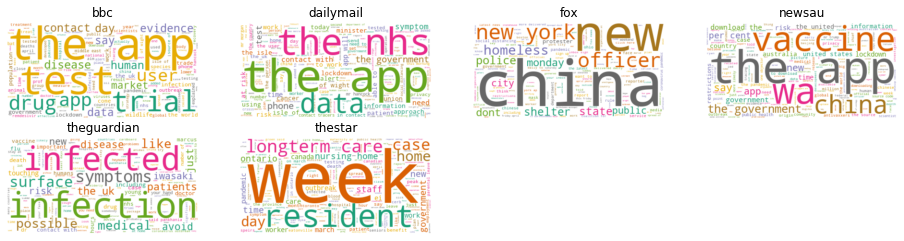

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

#numbers= ['foxnews1', 'foxnews2', 'foxnews3', 'foxnews4', 'foxnews5']
newspapernames = ['fox','bbc','theguardian','thestar','dailymail','newsau']

for index, newspapernames in enumerate(data.columns):
    wc.generate(data_clean.textbits[newspapernames])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(newspapernames)

plt.show()
    

In [11]:
#Målet med EDA er at se om en simpel analyse af vores data giver en form for mening. 
#Ud fra wordcloudsne synes jeg at der er noget god data.
#Vi overvejer om vi skal tilføje ordene "the app" til stop words. "the app" går igen så mange gange fordi nogle af siderne
#reklamere for deres app version af avisen. Dog er der også nogle artikler som snakker om en kinesisk tracker app. 
#Derfor har jeg besluttet at beholde det.
#Vi kan helt sikkert tilføje flere stop ord og måske bi-gram(stemming/lemmitazation) nedenfor.
#vigtigt! Lav nye cells til mere data-cleaning, ikke ændre de gamle
#ordet week virker ikke brugbart. Skal det addes til stopwords?